# HW2  Regression Fun Time!

A test of the minibatch gradient descent function!

In [1]:
# Imports
import autograd.numpy as np
import matplotlib.pyplot as plt
from os import getcwd, chdir

# Enable inline plotting
%matplotlib inline

First we start by implementing a linear regression model.

In [2]:
def model(w, x):
    """Predicts an outcome as a linenar combination of features and weights
            @param w: a numpy array of weights
            @param x: a numpy array of features
        @returns: the predicted outcome
        """
    return np.dot(x.T, w[1:]) + w[0]

For our first cost function, we will use least squared error.

In [3]:
def least_squares(w, x, y):    
    """Calculates the MSE of a model
            @param w: a numpy array of weights
            @param x: a numpy array of features
            @param y: the actual value
        @returns: the mean squared error of the model with the given weights and bias"""
    return np.sum((model(w, x) - y)**2) / float(y.size)

This is where we import the gradient descent function and read in the data.

In [4]:
# Import the dataset
csvname = 'Z:/machine-learning-from-scratch/data/kleibers_law_data.csv'
data = np.loadtxt(csvname, delimiter=',')
x = np.log(data[:-1, :])
y = np.log(data[-1:, :])

# Change the working directory
chdir('Z:/machine-learning-from-scratch/source')

# Import the gradient descent function
from gradient_descent import minibatch

It is always a good idea to visualize the data. The plot below shows a very linear relationship between our feature and output.

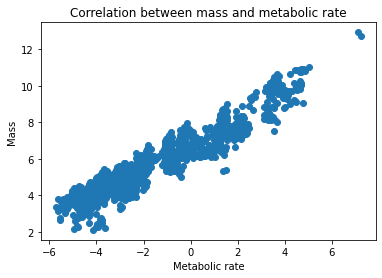

In [5]:
# Make a scatter plot
plt.scatter(x, y)

plt.title("Correlation between mass and metabolic rate")
plt.xlabel("Metabolic rate")
plt.ylabel("Mass")

plt.show()

Now we are going to fit a linear regression to the data using our minibatch gradient descent with the following parameters:

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

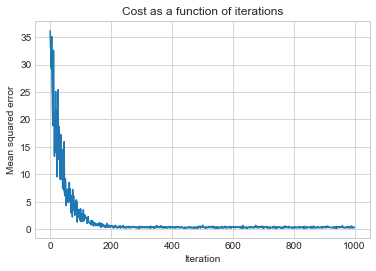

In [6]:
# Learn a line
first_run = minibatch(least_squares, 0.01, 1000, np.repeat(np.random.uniform(-0.1, 0.1), 2), x, y)

# Create the basic plot
plt.style.use("seaborn-whitegrid")
plt.plot(first_run[1])

# Make it look better
plt.title("Cost as a function of iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean squared error")

plt.show()

Now for the fun part. We will generate some test data and see how well our model predicts it.

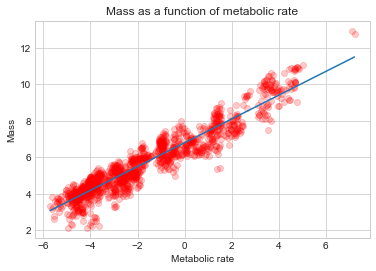

In [7]:
# Xs to use for prediction
s = np.linspace(np.min(x), np.max(x))

# Weights where the cost is minimized
w_pred = first_run[0][-1]

# Predicted y values
pred_y = w_pred[1]*s + w_pred[0]

plt.plot(s, pred_y)
plt.scatter(x, y, color="red", alpha=0.2)
plt.title("Mass as a function of metabolic rate")
plt.xlabel("Metabolic rate")
plt.ylabel("Mass")

plt.show()

Our linear regression worked pretty well, but what if we have some outliers? we are going to see with another data set. 

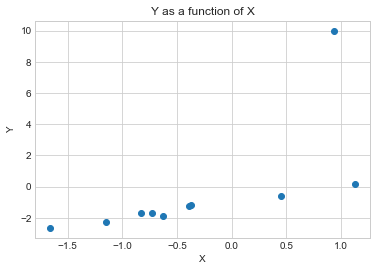

In [8]:
# load in dataset
data = np.loadtxt('Z:/machine-learning-from-scratch/data/regression_outliers.csv', delimiter=',')
x = data[:-1, :]
y = data[-1:, :]

# Make a scatter plot
plt.scatter(x, y)

# Give it some labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y as a function of X")

plt.show()

We are also going to try estimating a model using the least absolute deviations cost function to see how it performs with outliers.

In [9]:
def least_absolute_deviations(w, x, y):
    """Implements the least absolute deviatiions function
            @param w: a vector of initial weights to use
            @param x: a vector of features
            @param y: a vector of labels to predict
        @returns the cost of the linear combination of weights and features"""
    return np.sum(np.abs(model(w, x) - y)) / float(y.size)

Now it is time to run linear regressions with each of our cost functions and see how they do. we will use the following parameters:

Run 1) 
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.01

batch_size=200

Run 2) 
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.01

batch_size=200

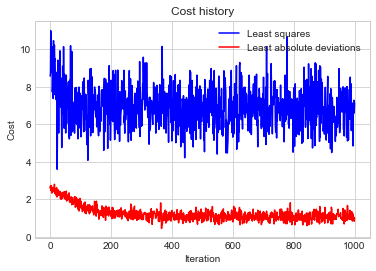

In [10]:
# Learn two lines with different cost functions
second_run = minibatch(least_squares, 0.01, 1000, np.array([1.0, 1.0]), x, y, 200)
third_run = minibatch(least_absolute_deviations, 0.01, 1000, np.array([1.0, 1.0]), x, y, 200)

# Instatniate the plot
plot1, ax = plt.subplots()

# Add cost histories
ax.plot(second_run[1], color="blue")
ax.plot(third_run[1], color="red")

# make the plot informative
ax.set_title("Cost history")
ax.legend(["Least squares", "Least absolute deviations"])
ax.xaxis.set_label_text("Iteration")
ax.yaxis.set_label_text("Cost")

plt.show()

Once agein, we will use some new data to make some predictions.

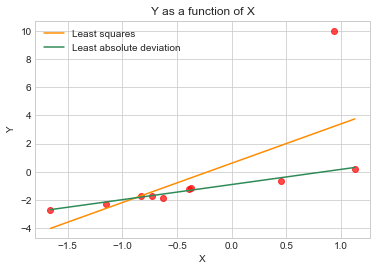

In [11]:
# Make input values to predict labels for
s = np.linspace(np.min(x), np.max(x))

# Get predictions from the second run
w_pred_2 = second_run[0][-1]
pred_y_2 = w_pred_2[1]*s + w_pred_2[0]

# Get predictions from the third run
w_pred_3 = third_run[0][-1]
pred_y_3 = w_pred_3[1]*s + w_pred_3[0]

# Instatniate the plot
plot2, ax = plt.subplots()

# Make a basic plot
ax.scatter(x, y, color="red", alpha=0.7, label="_nolegend_")
ax.plot(s, pred_y_2, color="darkorange")
ax.plot(s, pred_y_3, color="seagreen")

# Add informative text
ax.set_title("Y as a function of X")
ax.legend(["Least squares", "Least absolute deviation"])
ax.xaxis.set_label_text("X")
ax.yaxis.set_label_text("Y")

plt.show()

We are also going to use the mean squared error and mean absolute deviation functions to see how well the models predicted the data.

In [12]:
def MSE(y_actual, y_pred):
    return np.sum((y_actual - y_pred)**2) / y_actual.size

def MAD(y_actual, y_pred):
    return np.sum(np.abs(y_actual - y_pred)) / y_actual.size

Now it is time to see how well each model performed.

In [13]:
# Get predictions from the second run
w_pred_2_small = second_run[0][-1]
pred_y_2_small = w_pred_2_small[1]*x + w_pred_2_small[0]

# Get predictions from the third run
w_pred_3_small = third_run[0][-1]
pred_y_3_small = w_pred_3_small[1]*x + w_pred_3_small[0]

# Calculate the errors for both runs
print("The MSE of the first model is " + str(MSE(y, pred_y_2_small)))
print("The MAD of the first model is " + str(MAD(y, pred_y_2_small)))
print("The MSE of the second model is " + str(MSE(y, pred_y_3_small)))
print("The MAD of the first model is " + str(MAD(y, pred_y_3_small)))

The MSE of the first model is 6.842046975219344
The MAD of the first model is 1.6987839493719914
The MSE of the second model is 9.792945660779534
The MAD of the first model is 1.0909847850235246
